# A little statistics

## 1) Converting a probability into a 'sigma'. As discussed in class, 'sigma' refers to a probability in physics. Our first task is to figure out how, given a probability, to calculate the assoicated 'sigma' value. The sigma implicitly refers to the standard normal distribution (a Gaussian with mean zero and stard deviation of 1). As we discussed in class, integrals of the standard normal distribution give probabilities.  


### A) Look up the Normal distribution and read about it.  
Here is what a Z table looks like for z >= 0:  
![Z-Table](positiveztable.png)


### B) As in class, try integrating the standard normal distribution. This can be done either with the erfc(), or calls to specific statistical cumulative probability distributions such as normcdf() in MatLab or stats.norm.cdf() in scipy. Try several values of sigma, and make sure you are getting values that match the z-table.

0.5


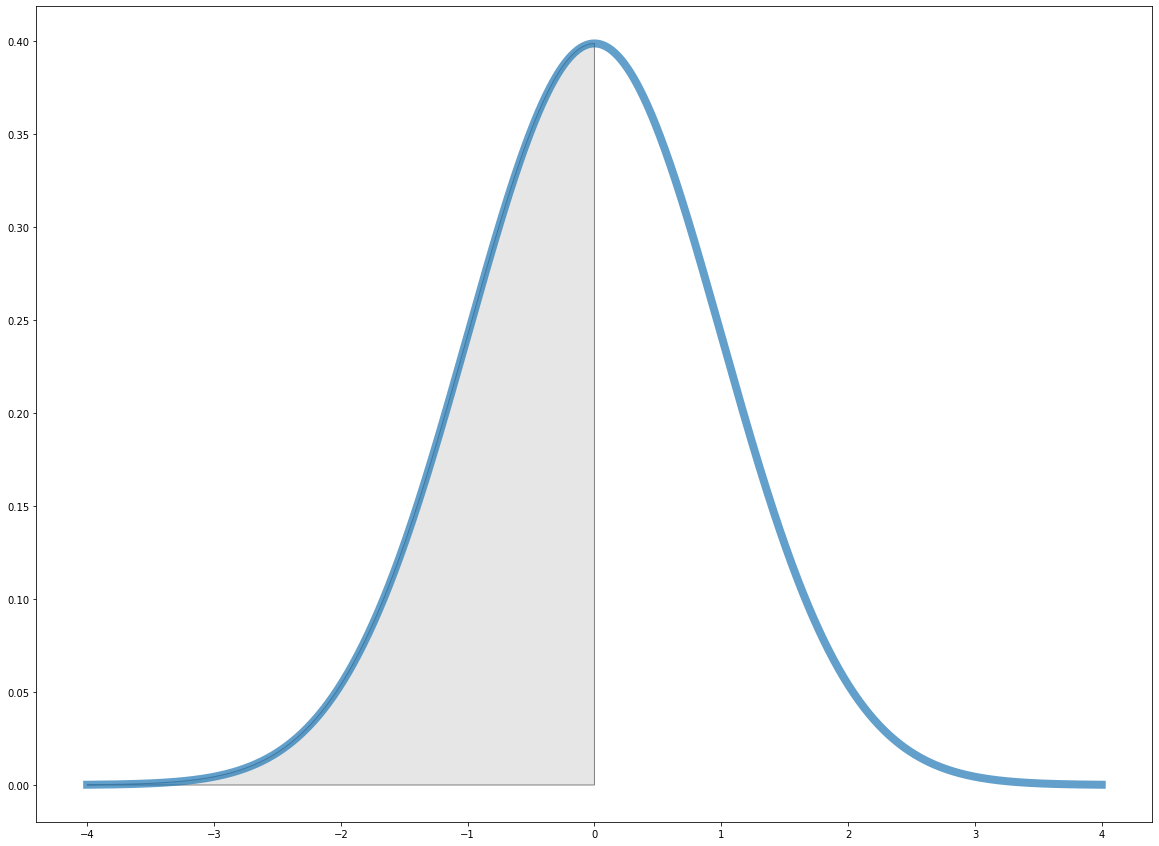

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from matplotlib.patches import Polygon

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)  
fig, ax = plt.subplots(1, 1)
x = np.linspace(-4,4,1000)

# integrates the normal distribution function from -inf to 0
# is equal to 0.5 because -inf to 0 is half the function
a, b = -4, 0
shaded = np.linspace(a,b,1000)
print(stats.norm.cdf(0, loc=0, scale=1))
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1),linewidth = 8,alpha =0.7)
verts = [(a, 0), *zip(shaded, stats.norm.pdf(shaded, loc=0, scale=1)), (b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

0.8413447460685429


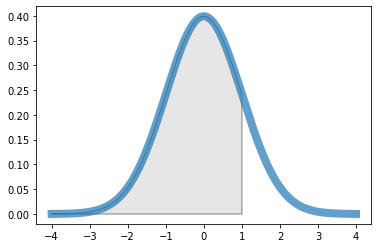

In [2]:

fig, ax = plt.subplots(1, 1)
x = np.linspace(-4,4,1000)

# now if we go from -inf to 1, we get 0.841, which matches our z table value
a, b = -4, 1
shaded = np.linspace(a,b,1000)
print(stats.norm.cdf(1, loc=0, scale=1))
ax.plot(x, stats.norm.pdf(x, loc=0, scale=1),linewidth = 8,alpha =0.7)
verts = [(a, 0), *zip(shaded, stats.norm.pdf(shaded, loc=0, scale=1)), (b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()


0.6914624612740131


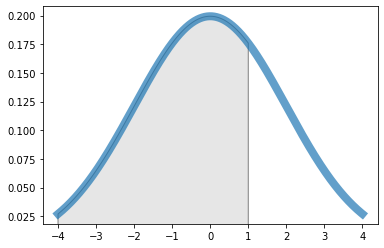

In [3]:

fig, ax = plt.subplots(1, 1)
x = np.linspace(-4,4,1000)

# now if we change scale (the standard deviation of our distribution), the shape of the distribution will be stretched or contracted by a factor of the standard deviation
# if we now integrate from -inf to 1, we are only going to half a standard deviation instead of a full deviation
# thus our z score is 0.5 which corrospondes to about 0.69 on our table.
a, b = -4, 1
print(stats.norm.cdf(b, loc=0, scale=2))
shaded = np.linspace(a,b,1000)
ax.plot(x, stats.norm.pdf(x, loc=0, scale=2),linewidth = 8,alpha =0.7)
verts = [(a, 0), *zip(shaded, stats.norm.pdf(shaded, loc=0, scale=2)), (b,0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)

plt.show()

### C) Now more often than not, we actually want to do the inverse: for a given probability determine the associated 'sigma' value: norminv() or erfcinv() in MatLab; stats.norm.ppf() in python. Try several probability values where you know what the answer should be (e.g. Probability associated with 1, 2, 5 sigma), and show that you get the right answer in terms of sigma.

In [4]:
# a probability of 50% (0.5) should corrospond to a location of 0
stats.norm.ppf(0.5, loc=0, scale=1)

0.0

In [5]:
# according to the 68-95-99 rule, a probability of 84% (68% of the data lives within 1 standard deviation, so 34% lives between 0 and 1) should give a location of about 1
stats.norm.ppf(0.84, loc=0, scale=1)

0.994457883209753

In [6]:
# riffing on the previous calculation, about 97.5% should be below 2 standard deviations
stats.norm.ppf(0.975, loc=0, scale=1)

1.959963984540054

In [44]:
# again, about 99.85% of data should be below 3 standard deviations
stats.norm.ppf(0.9985, loc=0, scale=1)

2.9677379253417944

### D)Think about and explain the meaning of the minus sign that appears, and discuss how you will deal with it.  
  
A minus sign appears when the corrosponding standard deviation is below the mean instead of above the mean.

## 2) Now let's explore some other continuous analytic distributions. Following the pattern from your first HW assigment, make both the analytic pdf() and a realization with ~100k samples using a built-in distribution; but this time don't use the Gaussian. Choose one of the following distributions: Rayleigh; Lognormal; Chi-Squared or Gamma; Exponential. You and your partner should choose different distributions.  
  
### All of this question will be about Exponential distribution  
  
#### A) Read up on your distribution
Exponential distributions are characterized by a probability density function that is 0 when $x < 0$ and equal to $\lambda e^{-\lambda x}$ for $x \geq 0$.  By integrating this funciton, one arrives at a cumulative distribution function of $F(x) = 0$ for $x < 0$ and $1-e^{-\lambda x}$ for $x \geq 0$.  The characteristic parameter, $\lambda$, is only valid when strictly greater than 0. This parameter is refered to as the *rate parameter* because it controls how quickly the PDF approaches 0. When $\lambda$ is small, it slows how fast the distribution approaches 0 probability, which implies that it has a lower probability near 0.  As the parameter grows, the distribution function shows a sharper decline, but starts higher when close to 0.  
  
The exponential distribution commonly occurs in physics when modeling events that have a roughly equal distribution accross a time interval.  An example of such a scenario is the decay of particles.  This distribution also models the distribution of a uniform gas in a gravity well.  
  
#### B) Make plots (tweaking distribution and plot parameters as needed)

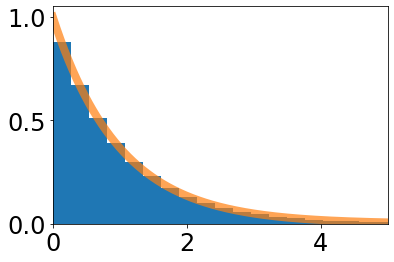

In [8]:
# Standard exponential distribution with a rate parameter of 1

d = stats.expon.rvs(loc=0, scale=1, size=100000)
fig, ax = plt.subplots(1, 1)
ax.hist(d, 50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5,1000)
ax.plot(x,stats.expon.pdf(x, loc=0, scale=1), linewidth = 8, alpha = 0.7)
plt.show()

**Graphing the log scale exponential distribution**  
This will produce a linear graph since $\log(\lambda e^{-\lambda x}) = \log(\lambda) - \lambda x \log(e)$

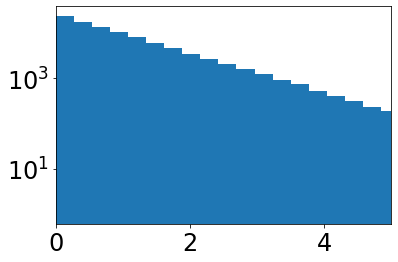

In [10]:
ax = plt.hist(d,50)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
plt.show()

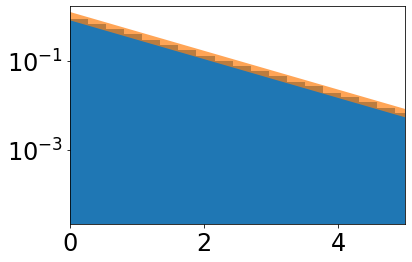

In [11]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.yscale('log')
plt.tick_params(labelsize = 24)
plt.xlim([0,5])
x = np.linspace(0,5.,1000)
ax.plot(x,stats.expon.pdf(x, loc=0, scale=1),linewidth = 8,alpha = 0.7)
plt.show()

## 3) Imagine that your signal-free data follows the distribution you have chosen; and you have a measurement for which you need to determine the 'sigma'

### A) Select a value for your hypothetical measurement


# Non-continuous distributions
## 1) One of you will study the Binomial, and the other the Poisson. Flip a coin to figure out who does which.
### A) Read up on the distributions
The Poisson distribution is useful for modeling the amount of times an event occurs in a given time or space interval.  The distribution is characterized by $P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$ where $k$ is the number of events in an interval and $\lambda$ is the average number of events in an interval.  An example of poisson distribution whuch actually came up in my other lab earlier this week was when measuring how many radioactive decays occur in a given time interval.  The mean and variance of the poisson distribution are both $\lambda$

### B) Make a series of plots with different parameters; and explain the features. (Hint: your plots will need to be discrete, sometimes 'stairs' style plots can be helpful).

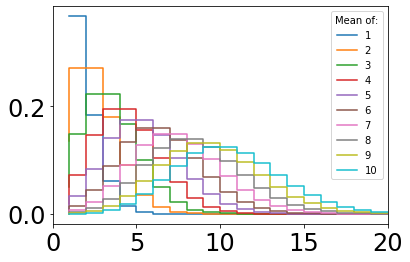

In [41]:
# Standard Poission distribution with a rate parameter of 1

fig, ax = plt.subplots(1, 1)
plt.tick_params(labelsize = 24)
upperlimit = 20
plt.xlim([0,upperlimit])
x = np.linspace(1,upperlimit,upperlimit)

for mu in range(10):
    mean = mu + 1
    y = stats.poisson.pmf(range(upperlimit), mean, loc=0)
    ax.step(x, y, label = mean)

plt.legend(title='Mean of:')
plt.show()

From this graph, we can see that as the parameter gets higher, the poisson distribution approaches a Gaussian.  At low values of $\lambda$, the distribution is heavily skewed to the right.  
  
### C) Again define a hypothetical question (clearly stated), and calculate the corresponding probability  
  
Given a radioactive sample with a decay rate average of 5 particles per second (and assuming all decays are detected) what is the probability of the sample producing 15 particles in a second?

In [43]:
# approach this using poisson distributing with a lmbda of 5 and k of 15
prob = stats.poisson.pmf(15, 5)
print(prob)

0.00015724543432107664


This shows that there is about a 0.016% chance of the sample producing 15 decays in one second.

### D) Because the distributions are discrete, so are the probabilities and 'sigmas'. Think about this and discuss the implications for experiments.

What this means is that you can't necessarily narrow down a precise value for your probability or sigma when doing experimentation.  Taking a larger sample size will decrease the uncertainty, however.

### E) While the results are discrete, the parameters of the distributions are not. For example, the mean of a Poisson distribution can be 9.2. Think about and explain why this makes sense and what changes continuously and what doesn't.  
  
The reason this makes sense is because even though a single experimental result will yield an integer, taking an average accross many trials will not.  For instance, if when flipping a coin we give heads a value of 1 and tails a value of 0, the expected average value is actually 0.5.  Similarly, a standard six sided dice has an expected value of 3.5.  You can have any arbitrary continuous value for the mean of the distribution, but the Poisson distribution is only interested in counting events in an interval, counts are always discrete.